In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handle-outlier/placement.csv


In [2]:
import seaborn as sns
import matplotlib as plt

In [3]:
df= pd.read_csv('/kaggle/input/handle-outlier/placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
df.duplicated().sum()

np.int64(19)

In [9]:
df['cgpa'].value_counts()

cgpa
6.67    10
7.46    10
7.19    10
7.09    10
7.33    10
        ..
8.87     1
9.12     1
4.89     1
8.62     1
4.90     1
Name: count, Length: 261, dtype: int64

In [10]:
outlier_handle= df.select_dtypes(include= 'number').columns

In [11]:
outlier_data= {}

for col in outlier_handle:
    percentile25= df[col].quantile(0.25)
    percentile75= df[col].quantile(0.75)

    IQR= percentile75 - percentile25

    upper= percentile75 - 1.5 * IQR
    lower= percentile25 - 1.5 * IQR

    outlier_data[col]= ((df[col] > percentile75) | (df[col] < percentile25)).sum()

In [12]:
outlier_data

{'cgpa': np.int64(491),
 'placement_exam_marks': np.int64(473),
 'placed': np.int64(0)}

In [13]:
import warnings
warnings.filterwarnings('ignore')

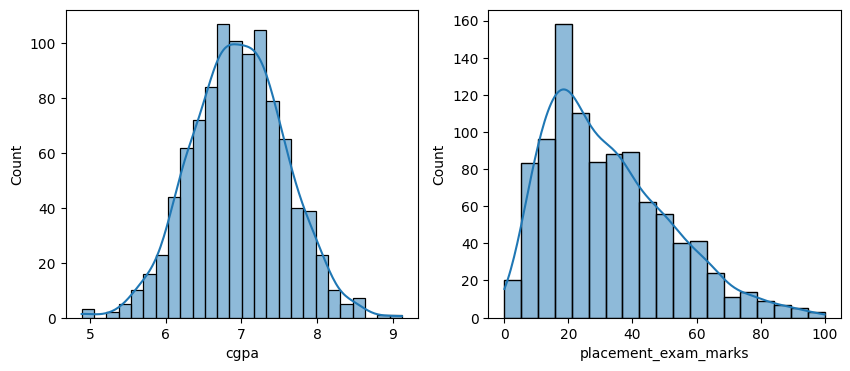

In [14]:
# plt.figure(figsize= (10, 4))
# plt.subplot(2,2,1)
# sns.distplot(df['cgpa'])

# plt.subplot(2,2,2)
# sns.distplot(df['placement_exam_marks'])

# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()


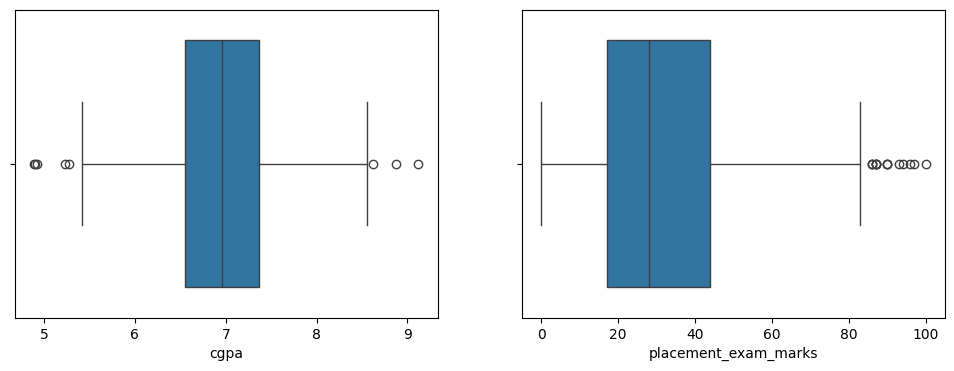

In [15]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
sns.boxplot(x= df['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(x= df['placement_exam_marks'])

plt.show()

In [16]:
df[['cgpa', 'placement_exam_marks']].max()
df[['cgpa','placement_exam_marks']].min()

cgpa                    4.89
placement_exam_marks    0.00
dtype: float64

In [17]:
#handle outlier

# IQR based outlier removal (BEST & CLEAN)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


In [18]:
df_clean

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


In [19]:
df_clean.shape

(977, 3)

<Axes: xlabel='cgpa'>

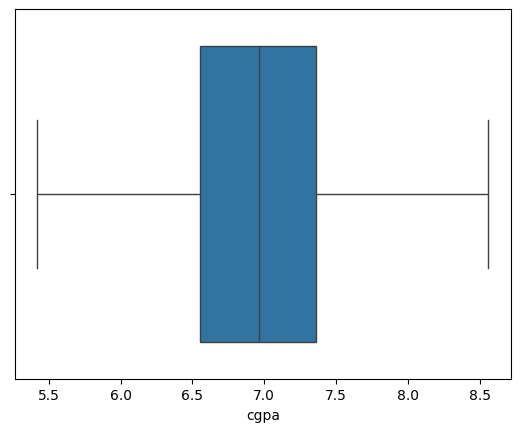

In [20]:
sns.boxplot(x= df_clean['cgpa'])

<Axes: xlabel='placement_exam_marks'>

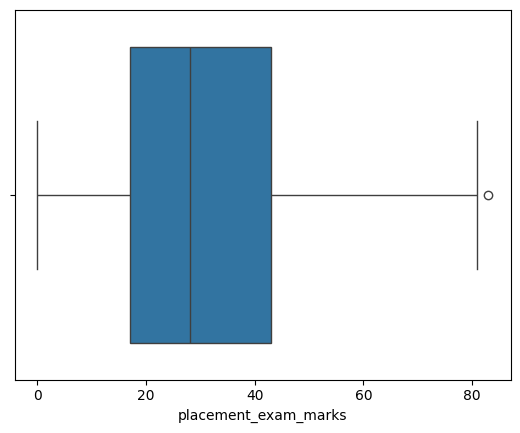

In [21]:
sns.boxplot(x= df_clean['placement_exam_marks'])

In [22]:
df_clean['placement_exam_marks'].max()

83.0

In [23]:
# new_df3= df.copy()
# new_df3['placement_exam_marks']= np.where(
#     new_df3['placement_exam_marks'] > upper_limit,
#     upper_limit,
#     np.where(
#         new_df3['placement_exam_marks'] < lower_limit,
#         lower_limit,
#         new_df3['placement_exam_marks']
#     )
# )

In [24]:
# new_df3

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

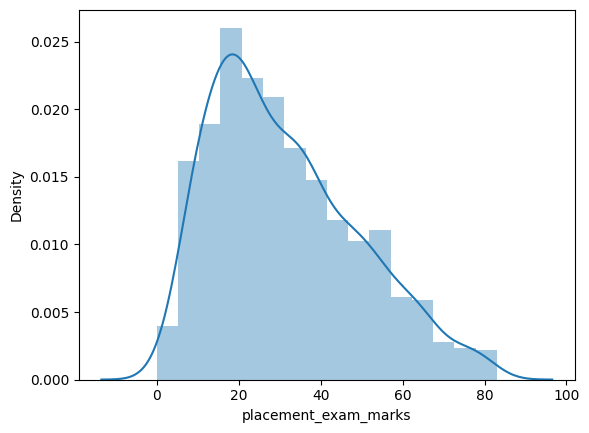

In [25]:
sns.distplot(df_clean['placement_exam_marks'])

In [26]:
upper_limit= df['placement_exam_marks'].quantile(0.99)
lower_limit= df['placement_exam_marks'].quantile(0.01)

In [27]:
#capping

df['placement_exam_marks']= np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [28]:
df['placement_exam_marks'].max()

87.0

<Axes: xlabel='placement_exam_marks'>

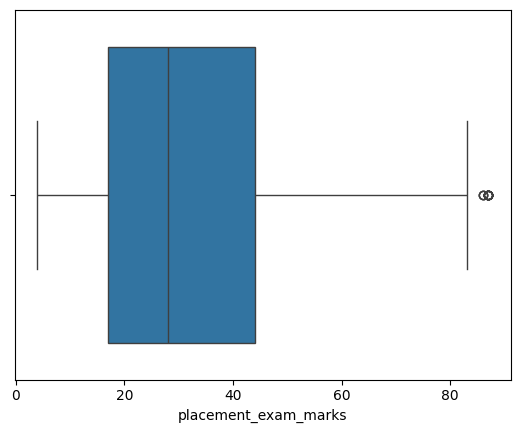

In [29]:
sns.boxplot(x= df['placement_exam_marks'])

In [30]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.183000,0.489000
std,0.615898,18.944509,0.500129
min,4.890000,4.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,87.000000,1.000000


In [31]:
df_clean.describe()

,cgpa,placement_exam_marks,placed
count,977.000000,977.000000,977.000000
mean,6.965558,31.285568,0.487206
std,0.592141,17.859806,0.500092
min,5.420000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.360000,43.000000,1.000000
max,8.560000,83.000000,1.000000
